## This notebook assumes you have the following packages installed in your conda environment.

In [61]:
import pandas as pd
import json
import community
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import randomcolor

In [62]:
df_default = pd.read_csv('scripts-data/run_1/default-nd.csv')
df_default.shape


(2728, 171)

In [63]:
df_sign = pd.read_csv('scripts-data/run_1/signdata.csv')
df_sign.shape

(2728, 176)

In [64]:
df_default["Code"].values

array(['J_01_098', 'H_02_048', 'H_03_086', ..., 'E_03_042', 'B_02_056',
       'D_01_057'], dtype=object)

## Community Analysis

In [65]:
edges_df = pd.read_csv('scripts-data/run_1/default-neighbors.csv')
edges_df = edges_df.rename(columns={"neighbor": "source"})
edges_df.head()


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
2,A_01_002,F_02_088,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
3,A_01_002,H_03_004,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0
4,A_01_002,J_03_046,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN


In [66]:
edges_df.shape

(13250, 6)

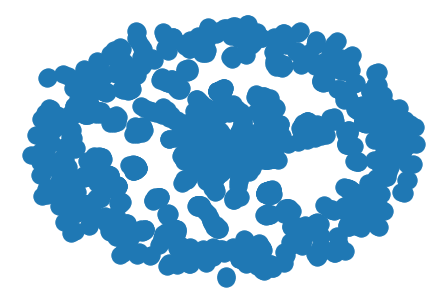

In [67]:
g = nx.from_pandas_edgelist(edges_df, source='source', target='target') 
nx.draw(g)

In [68]:
#first compute the best partition
from networkx.algorithms.community import greedy_modularity_communities
G = g

#Two methods for community analysis
c = greedy_modularity_communities(G)
partition = community.best_partition(G)

In [69]:
len(c)

274

In [70]:
num_nodes = 0
for community in c:
    num_nodes += len(community)
print(num_nodes)

1920


In [71]:
len(partition)

1920

In [72]:
#Noes only connected by edges. Does not include standalone nodes.

list = partition.items()
print(len(list))
df_with_groupids = pd.DataFrame(list, columns=['Code', 'group_id'])
df_with_groupids.head()

1920


,Code,group_id
0,B_01_062,0
1,A_01_002,0
2,C_03_023,0
3,F_02_088,0
4,H_03_004,0


In [73]:
# get edges only where source and target nodes belong to a valid community for now. This is to assign them group ids.
nodes_in_communities = df_with_groupids['Code'].unique()
edges_for_community_nodes_df = edges_df.loc[edges_df['source'].isin(nodes_in_communities) & edges_df['target'].isin(nodes_in_communities)]
print(len(edges_for_community_nodes_df['source'].unique()))
print(edges_df.shape)
print(edges_for_community_nodes_df.shape)
edges_for_community_nodes_df.head()

1920
(13250, 6)
(13250, 6)


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
2,A_01_002,F_02_088,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
3,A_01_002,H_03_004,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0
4,A_01_002,J_03_046,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN


In [74]:

df_merged = pd.merge(df_default, df_with_groupids,how='left', on=['Code'])
print(df_merged.shape)
# print(df_merged.columns.values)
df_merged.head()

(2728, 172)


,EntryID,LemmaID,Code,YouTube Video,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,SignFrequency(M-Native),...,H index,SignBankID,Parameter.Neighborhood.Density.2.0,Neighborhood Density 2.0,Parameter.Neighborhood.Density.2.0.1,Neighborhood Density 2.0.1,DominantTranslation,SignBankID.1,Neighborhood Density,group_id
0,arms-cross,arms-cross,J_01_098,NaN,3.467,2.177,-0.458,30,0,3.400,...,NaN,arms-cross\t,0,3,0,3,NaN,arms-cross\t,0,NaN
1,raise-hand,raise-hand,H_02_048,NaN,5.154,1.891,0.544,28,0,5.500,...,NaN,raise-hand\t,0,3,0,3,NaN,raise-hand\t,0,NaN
2,sigh,sigh,H_03_086,NaN,3.931,1.751,-0.196,30,0,3.267,...,NaN,sigh\t,0,3,0,3,NaN,sigh\t,0,NaN
3,1_dollar,1_dollar,C_02_025,NaN,3.034,1.500,-0.775,29,0,2.944,...,NaN,DOLLAR,9,0,9,0,NaN,DOLLAR,0,NaN
4,5_dollars,5_dollars,B_01_062,NaN,5.120,1.716,0.302,25,0,5.214,...,-0.2,FIVE-DOLLARS,8,4,8,4,NaN,FIVE-DOLLARS,5,0.0


In [75]:

#Will assign all NaN's same color for now. That's okay.

df_merged.head()
unique_community_ids = df_merged['group_id'].unique()
color_dict = []
for groupid in unique_community_ids:
    #generate a random color
    color = randomcolor.RandomColor().generate()[0]
    color_dict.append({'group_id': groupid, 'color_code': color})
    
color_dict

[{'group_id': nan, 'color_code': '#27b722'},
 {'group_id': 0.0, 'color_code': '#dd2c9f'},
 {'group_id': 130.0, 'color_code': '#87e5ad'},
 {'group_id': 168.0, 'color_code': '#1403ad'},
 {'group_id': 117.0, 'color_code': '#514fad'},
 {'group_id': 240.0, 'color_code': '#615fe2'},
 {'group_id': 128.0, 'color_code': '#0ef2f9'},
 {'group_id': 52.0, 'color_code': '#91db67'},
 {'group_id': 198.0, 'color_code': '#61d350'},
 {'group_id': 125.0, 'color_code': '#568909'},
 {'group_id': 166.0, 'color_code': '#fce4bf'},
 {'group_id': 41.0, 'color_code': '#61d387'},
 {'group_id': 87.0, 'color_code': '#4fe251'},
 {'group_id': 167.0, 'color_code': '#fceba6'},
 {'group_id': 60.0, 'color_code': '#8fcc49'},
 {'group_id': 2.0, 'color_code': '#83ba2a'},
 {'group_id': 12.0, 'color_code': '#9ff9b4'},
 {'group_id': 176.0, 'color_code': '#9ff4a1'},
 {'group_id': 254.0, 'color_code': '#3ec486'},
 {'group_id': 103.0, 'color_code': '#67ea4d'},
 {'group_id': 86.0, 'color_code': '#f25c66'},
 {'group_id': 127.0, 'col

In [76]:
color_df = pd.DataFrame(color_dict)
df_merged_with_color = pd.merge(df_merged, color_df,how='left', on=['group_id'])
print(df_merged_with_color.shape)
df_merged_with_color.head()


(2728, 173)


,EntryID,LemmaID,Code,YouTube Video,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,SignFrequency(M-Native),...,SignBankID,Parameter.Neighborhood.Density.2.0,Neighborhood Density 2.0,Parameter.Neighborhood.Density.2.0.1,Neighborhood Density 2.0.1,DominantTranslation,SignBankID.1,Neighborhood Density,group_id,color_code
0,arms-cross,arms-cross,J_01_098,NaN,3.467,2.177,-0.458,30,0,3.400,...,arms-cross\t,0,3,0,3,NaN,arms-cross\t,0,NaN,#27b722
1,raise-hand,raise-hand,H_02_048,NaN,5.154,1.891,0.544,28,0,5.500,...,raise-hand\t,0,3,0,3,NaN,raise-hand\t,0,NaN,#27b722
2,sigh,sigh,H_03_086,NaN,3.931,1.751,-0.196,30,0,3.267,...,sigh\t,0,3,0,3,NaN,sigh\t,0,NaN,#27b722
3,1_dollar,1_dollar,C_02_025,NaN,3.034,1.500,-0.775,29,0,2.944,...,DOLLAR,9,0,9,0,NaN,DOLLAR,0,NaN,#27b722
4,5_dollars,5_dollars,B_01_062,NaN,5.120,1.716,0.302,25,0,5.214,...,FIVE-DOLLARS,8,4,8,4,NaN,FIVE-DOLLARS,5,0.0,#dd2c9f


In [77]:
df_merged_with_color.shape

(2728, 173)

In [78]:
#Need only 3 columsn for now
df_node_graph_json_data = df_merged_with_color[["EntryID", "Code", "group_id", "color_code", "SignFrequency(Z)"]]
print(df_node_graph_json_data.shape)
df_node_graph_json_data.head(20)


(2728, 5)


,EntryID,Code,group_id,color_code,SignFrequency(Z)
0,arms-cross,J_01_098,NaN,#27b722,-0.458
1,raise-hand,H_02_048,NaN,#27b722,0.544
2,sigh,H_03_086,NaN,#27b722,-0.196
3,1_dollar,C_02_025,NaN,#27b722,-0.775
4,5_dollars,B_01_062,0.0,#dd2c9f,0.302
5,8_hour,C_02_055,NaN,#27b722,-0.043
6,9_oclock,C_02_080,130.0,#87e5ad,-0.126
7,a-line_bob,K_03_127,168.0,#1403ad,-0.198
8,a_little_bit,H_03_025,117.0,#514fad,-0.762
9,abbreviate,G_01_040,240.0,#615fe2,0.669


In [79]:
edges_df.head()

,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
2,A_01_002,F_02_088,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
3,A_01_002,H_03_004,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0
4,A_01_002,J_03_046,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN


In [80]:
not_need_edge_cols = ['num_matched_features', 'matched_features', 'num_missed_features', 'missed_features']
links_df = edges_df.drop(columns=not_need_edge_cols)
links_df.head()

,target,source
0,A_01_002,B_01_062
1,A_01_002,C_03_023
2,A_01_002,F_02_088
3,A_01_002,H_03_004
4,A_01_002,J_03_046


In [81]:
edges_json_str = links_df.to_json(orient="records")
edges_json = json.loads(edges_json_str)
edges_json[0]

{'target': 'A_01_002', 'source': 'B_01_062'}

In [82]:
#### Get rid of morpheme columbs
print(len(df_default.columns.values))
df_sign = df_sign[['YouTube Video','Code']]
df_sign = df_sign.rename(columns={"YouTube Video": "video"}, errors="raise")
df_sign.head()
df_default = pd.merge(df_default, df_sign,how='left', on=['Code'])

test_df = df_default
filtered = test_df.filter(regex='M..2.0|Video')
no_morphemes_df = test_df[test_df.columns.drop(filtered.columns.values)]
len(no_morphemes_df.columns.values)


171


86

In [83]:
### Add sign constraint range values
numerical_attr = no_morphemes_df.select_dtypes(include=['float', 'int']).columns.values
categorical_attr = []
for column in no_morphemes_df.columns.values:
    if column not in numerical_attr:
        categorical_attr.append(column)   
# print(numerical_attr)
# print(categorical_attr)

In [84]:
import math 
import pprint

constraints = {}
for attr in categorical_attr:
    if attr not in ['EntryID', 'LemmaID', 'Code', 'Iconicity_ID']:
        columnsData = no_morphemes_df.loc[ : , attr ].dropna()
        values_set = set(columnsData.values)
        constraints[attr] = [*values_set, ]
        
for attr in numerical_attr:    
    #drop nan values 
    columnsData = no_morphemes_df.loc[ : , attr ].dropna()
    constraints[attr] = {}  
    #print(math.floor(min(list(columnsData))), math.ceil(max(list(columnsData))), attr)
    constraints[attr]['min'] = math.floor(min(columnsData.values))
    constraints[attr]['max'] = math.ceil(max(columnsData.values))

pprint.pprint(constraints)

{'ClipLength(ms)': {'max': 3737, 'min': 701},
 'Compound.2.0': {'max': 1, 'min': 0},
 'Contact.2.0': {'max': 1, 'min': 0},
 'Contact.2.0Frequency': {'max': 1694, 'min': 1030},
 'D.Iconicity(M) all': {'max': 7, 'min': 1},
 'D.Iconicity(M) native': {'max': 7, 'min': 1},
 'D.Iconicity(N) all': {'max': 31, 'min': 26},
 'D.Iconicity(N) native': {'max': 22, 'min': 18},
 'D.Iconicity(SD) all': {'max': 3, 'min': 0},
 'D.Iconicity(SD) native': {'max': 3, 'min': 0},
 'D.Iconicity(Z) all': {'max': 3, 'min': -2},
 'D.Iconicity(Z) native': {'max': 3, 'min': -2},
 'DominantTranslation': ['hinge',
                         'channel',
                         'appointment',
                         'sunbathe_2',
                         'smell_money',
                         'spread_3',
                         'dunk_head',
                         'feed',
                         'first',
                         'mention',
                         'glow',
                         'atlanta',
        

                  'BEARD',
                  'DEPEND',
                  'SUN',
                  'PROXIMALIZATION',
                  'BLUR',
                  'CONVINCEb',
                  'FOREVERy',
                  'EYE-TURN\t',
                  'EXPRESS',
                  'PREDICT',
                  'RABBIT-EARS',
                  'ALLIGATOR',
                  'STRICT',
                  'WEix',
                  'ROOMb',
                  'CONFIDENT',
                  'CURLY-HAIR',
                  'PLIERS',
                  'MEETING',
                  'CRACK',
                  'TIME-TO-TIME\t',
                  'VEST',
                  'APPEAR',
                  'ERASER',
                  'EMAIL',
                  'IX',
                  'BALL',
                  'ASIA',
                  'CAMERA',
                  'EXAMPLEix',
                  'PRACTICE',
                  'MONSTER',
                  'SODA',
                  'DEODORANTstr',
               

           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/4otiXEqlQks?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/H4zITd5RuVU?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/lTEwmy7ubcw?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/5Q4hgBVWxsM?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/aPsbhbRxX9A?rel=0&amp;controls=0&amp;showinfo=

           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/UFXLWe9blWw?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/umjyEBcs_N8?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/p1dbHjX-IIE?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/ivm4gF_Eppg?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/mK7Er14q68w?rel=0&amp;controls=0&amp;showinfo=

           'frameborder="0" allowfullscreen=""></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/DbYUIZe9vm0?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/mGP90xTPV9E?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/Ln1lLRQwolE?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/mbqbri5E61E?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/KFScZThsE_o?rel=0&amp;controls=0&amp;showin

           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/AlEx72aV4oE?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/gyZPRRAcMYo?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/ILHu8GuXOjo?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/QIdhXvWMdGM?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/Y5l939aCn58?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></ifram

In [85]:
nodes_json_str = df_node_graph_json_data.to_json(orient="records")
nodes_json = json.loads(nodes_json_str)
nodes_json[0]


{'EntryID': 'arms-cross',
 'Code': 'J_01_098',
 'group_id': None,
 'color_code': '#27b722',
 'SignFrequency(Z)': -0.458}

In [86]:
no_morphemes_df[no_morphemes_df['Code'].isin(df_default["Code"].values)]


,EntryID,LemmaID,Code,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,SignFrequency(M-Native),SignFrequency(SD-Native),...,H index,SignBankID,Parameter.Neighborhood.Density.2.0,Neighborhood Density 2.0,Parameter.Neighborhood.Density.2.0.1,Neighborhood Density 2.0.1,DominantTranslation,SignBankID.1,Neighborhood Density,video
0,arms-cross,arms-cross,J_01_098,3.467,2.177,-0.458,30,0,3.400,2.293,...,NaN,arms-cross\t,0,3,0,3,NaN,arms-cross\t,0,"<iframe width=""280"" height=""158"" src=""https://..."
1,raise-hand,raise-hand,H_02_048,5.154,1.891,0.544,28,0,5.500,1.446,...,NaN,raise-hand\t,0,3,0,3,NaN,raise-hand\t,0,"<iframe width=""280"" height=""158"" src=""https://..."
2,sigh,sigh,H_03_086,3.931,1.751,-0.196,30,0,3.267,1.624,...,NaN,sigh\t,0,3,0,3,NaN,sigh\t,0,"<iframe width=""280"" height=""158"" src=""https://..."
3,1_dollar,1_dollar,C_02_025,3.034,1.500,-0.775,29,0,2.944,1.474,...,NaN,DOLLAR,9,0,9,0,NaN,DOLLAR,0,"<iframe width=""280"" height=""158"" src=""https://..."
4,5_dollars,5_dollars,B_01_062,5.120,1.716,0.302,25,0,5.214,1.847,...,-0.20,FIVE-DOLLARS,8,4,8,4,NaN,FIVE-DOLLARS,5,"<iframe width=""280"" height=""158"" src=""https://..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,zero,zero,D_03_036,4.192,1.415,0.051,26,0,4.313,1.138,...,NaN,ZERO,19,5,19,5,NaN,ZERO,6,"<iframe width=""280"" height=""158"" src=""https://..."
2724,zipper,zipper,D_01_034,3.148,1.610,-0.556,27,0,2.875,1.310,...,NaN,ZIPPER,0,0,0,0,NaN,ZIPPER,0,"<iframe width=""280"" height=""158"" src=""https://..."
2725,zoo,zoo,E_03_042,3.533,1.776,-0.346,30,0,3.857,1.916,...,NaN,NaN,4,3,4,3,NaN,NaN,3,"<iframe width=""280"" height=""158"" src=""https://..."
2726,zoom_in,zoom_in,B_02_056,3.958,1.781,-0.443,24,0,3.929,1.492,...,-0.19,ZOOM-IN\t,38,0,38,0,zoom_in,ZOOM-IN\t,0,"<iframe width=""280"" height=""158"" src=""https://..."


In [87]:
# write all the data frames to respective json files

graph = {
    "nodes" : nodes_json,
    "links": edges_json
}

with open("scripts-data/graph.json", 'w') as file:
    json.dump(graph, file)
    
    
with open('scripts-data/constraints.json', 'w') as fp:
    json.dump(constraints, fp)
    
no_morphemes_df.reset_index().to_json('scripts-data/sign_props.json', orient='records')


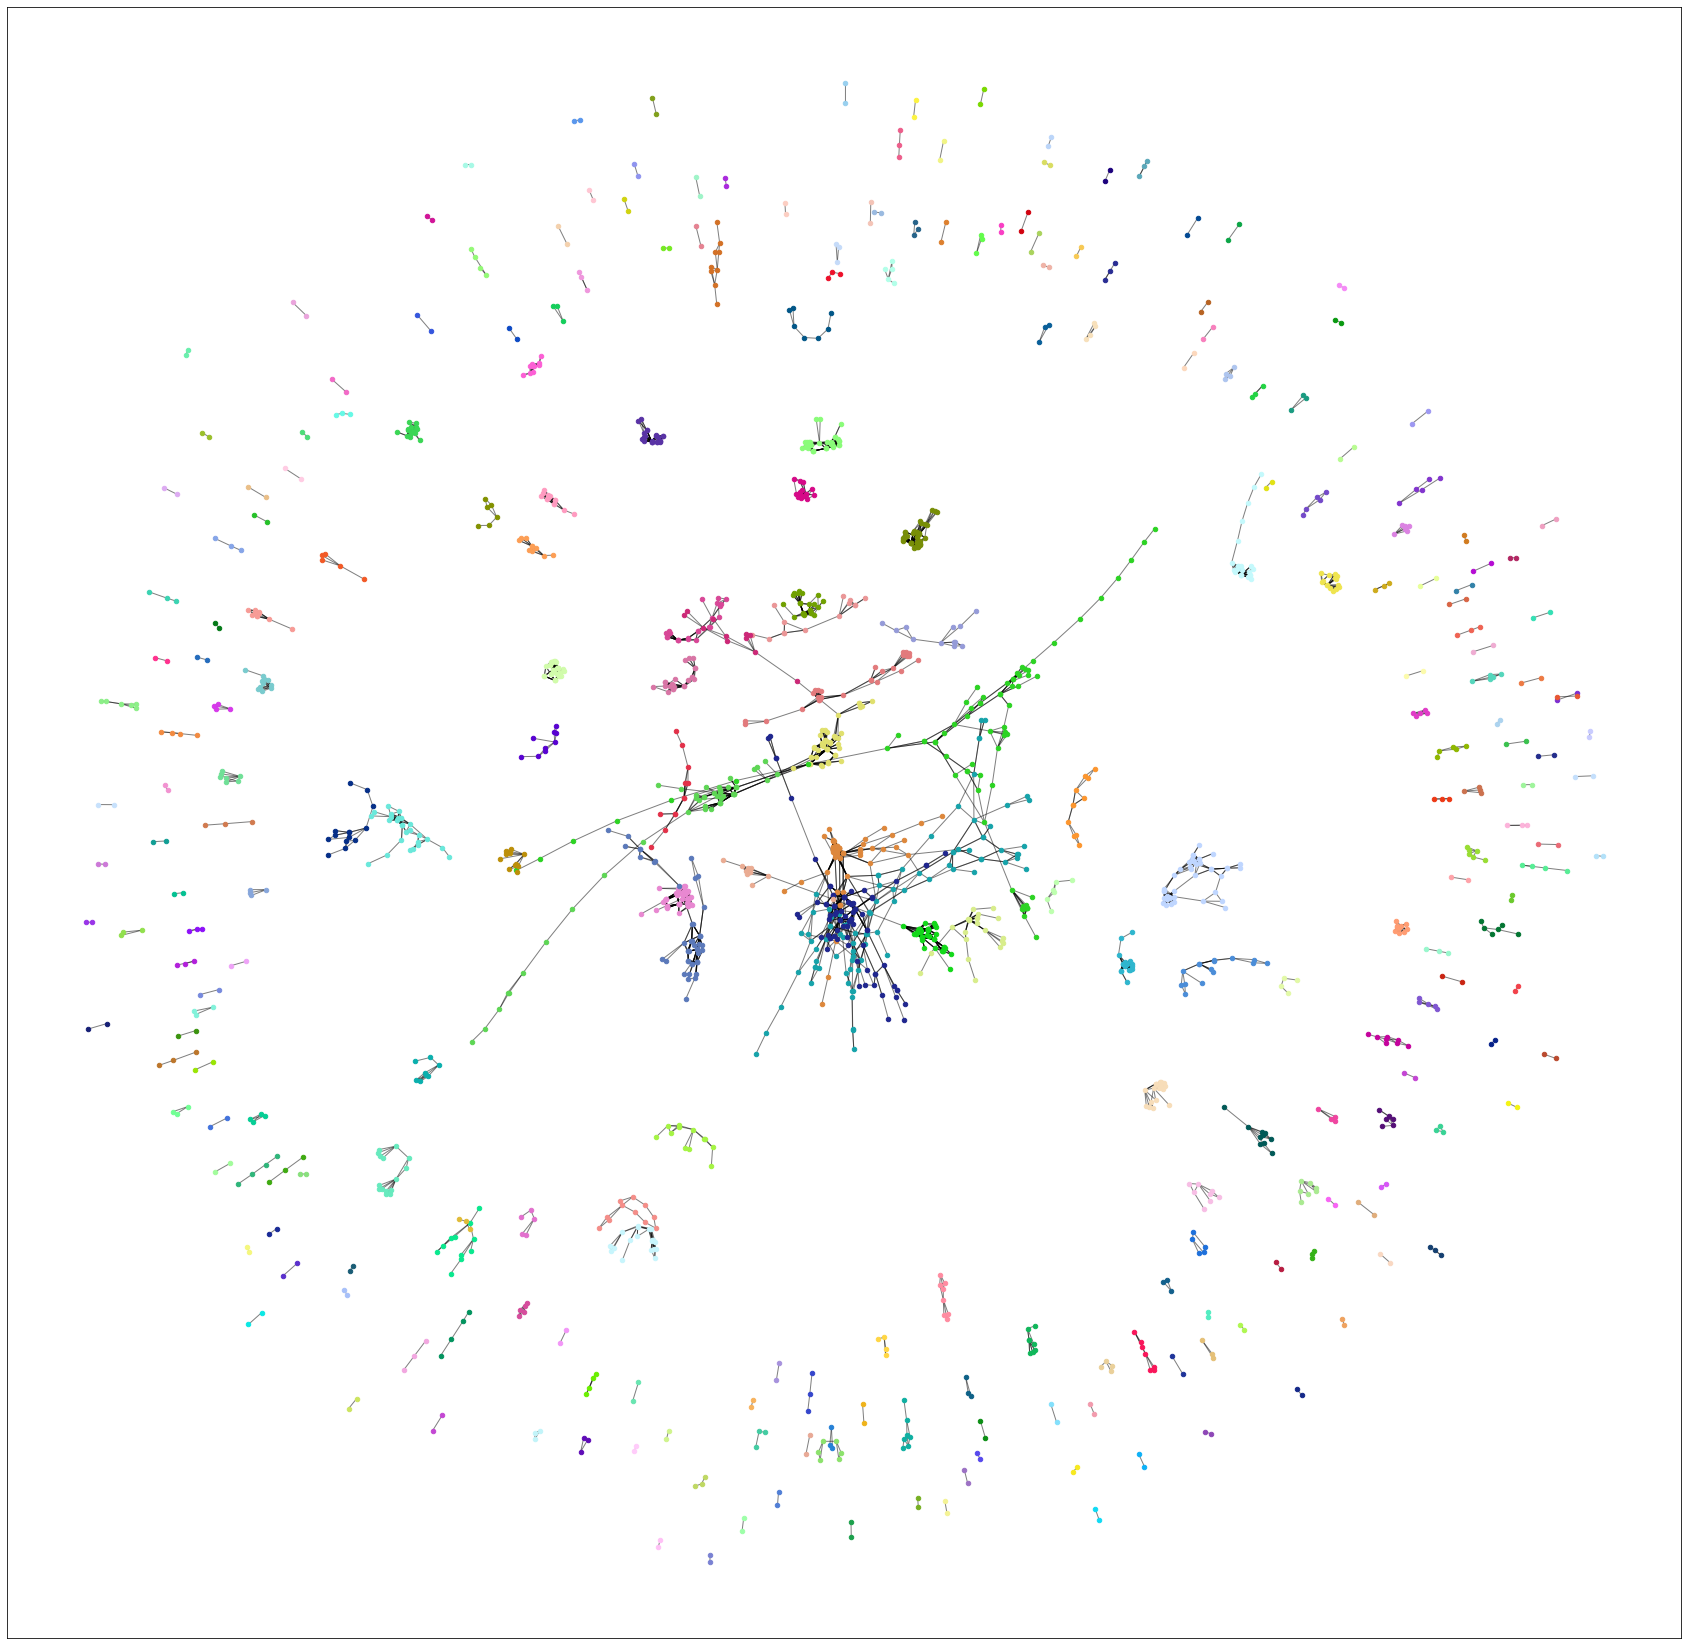

In [88]:
#drawing only nodes with edges
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(30)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = randomcolor.RandomColor().generate()[0])


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()